In [2]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 1 level QGB (total pegs: 1)

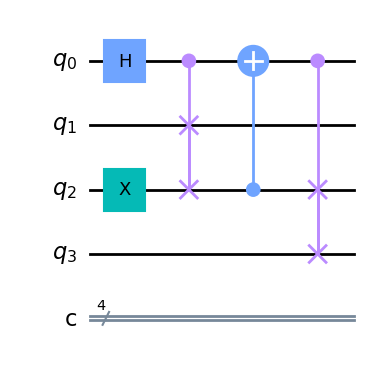

Measurement results (bitstrings):
1001 : 5002
0011 : 4998


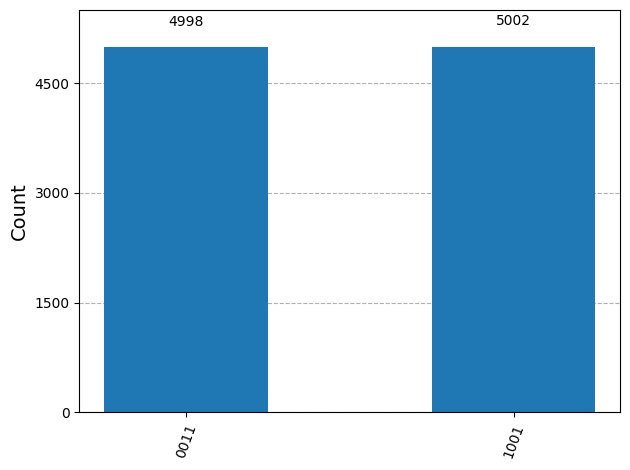

In [20]:
q= QuantumRegister(4, 'q')
c= ClassicalRegister(4, 'c')
qc = QuantumCircuit(q, c)


qc.h(q[0])
qc.x(q[2])
qc.cswap(q[0], q[1], q[2])
qc.cx(q[2], q[0])
qc.cswap(q[0], q[2], q[3])

qc.draw(output='mpl', style='clifford') 
plt.show()

for i in range(0, 4):
    qc.measure(q[i], c[i])



backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1e4)
counts = job.result().get_counts()
print("Measurement results (bitstrings):")
for bitstring, count in sorted(counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{bitstring} : {count}")

plot_histogram(counts)
plt.show()


## 2 level QGB (total pegs: 3)

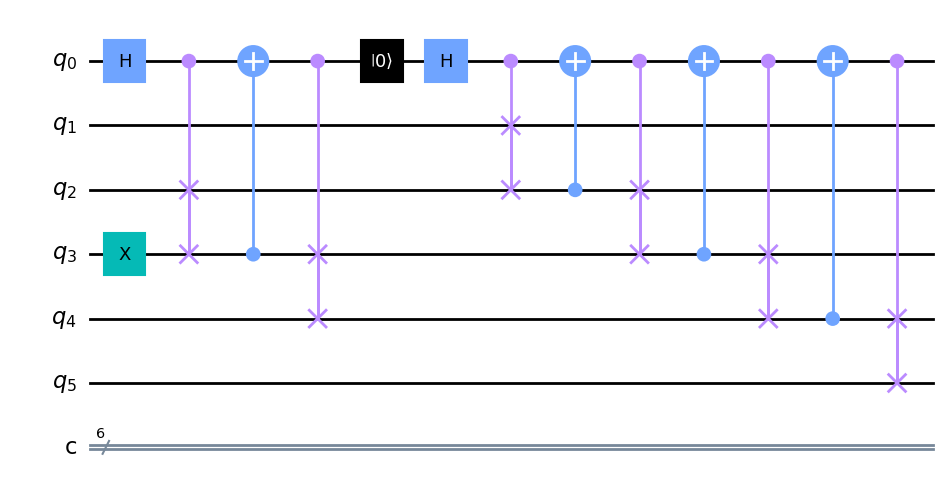

Measurement results (bitstrings):
001000 : 4979
100000 : 2576
000010 : 2445


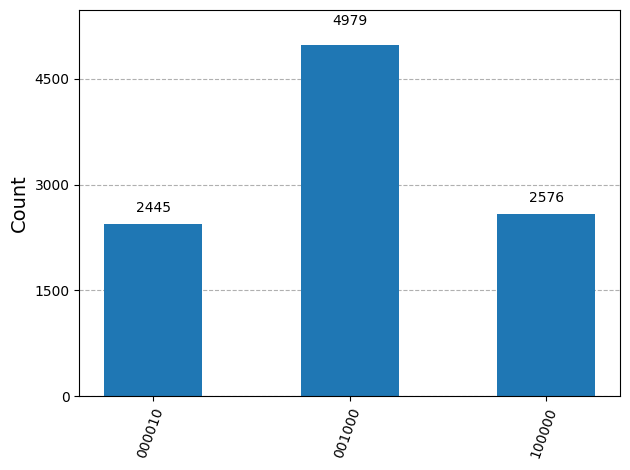

In [21]:
q = QuantumRegister(6, 'q')
c = ClassicalRegister(6, 'c')
qc = QuantumCircuit(q, c)


qc.x(q[3])
qc.h(q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])

qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[1], q[2])
qc.cx(q[2], q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])

qc.draw(output='mpl', style='clifford') 
plt.show()

for i in range(1, 6):
    qc.measure(q[i], c[i])

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1e4)
counts = job.result().get_counts()
print("Measurement results (bitstrings):")
for bitstring, count in sorted(counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{bitstring} : {count}")

plot_histogram(counts)
plt.show()




## 3 level QGB (total pegs: 6)

Measurement results (bitstrings):
00001000 : 3781
00100000 : 3767
00000010 : 1248
10000000 : 1204


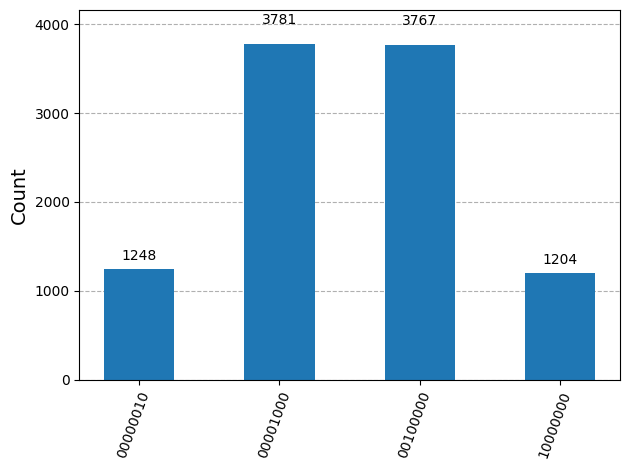

In [26]:
q = QuantumRegister(8, 'q')
c = ClassicalRegister(8, 'c')
qc = QuantumCircuit(q, c)


qc.x(q[4])
qc.h(q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])

qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[5], q[6])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[4], q[5])


qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[1], q[2])
qc.cx(q[2], q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[5], q[6])
qc.cx(q[6], q[0])
qc.cswap(q[0], q[6], q[7])



for i in range(1, 8):
    qc.measure(q[i], c[i])

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1e4)
counts = job.result().get_counts()
print("Measurement results (bitstrings):")
for bitstring, count in sorted(counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{bitstring} : {count}")

plot_histogram(counts)
plt.show()


## 4 level QGB (total pegs: 10)

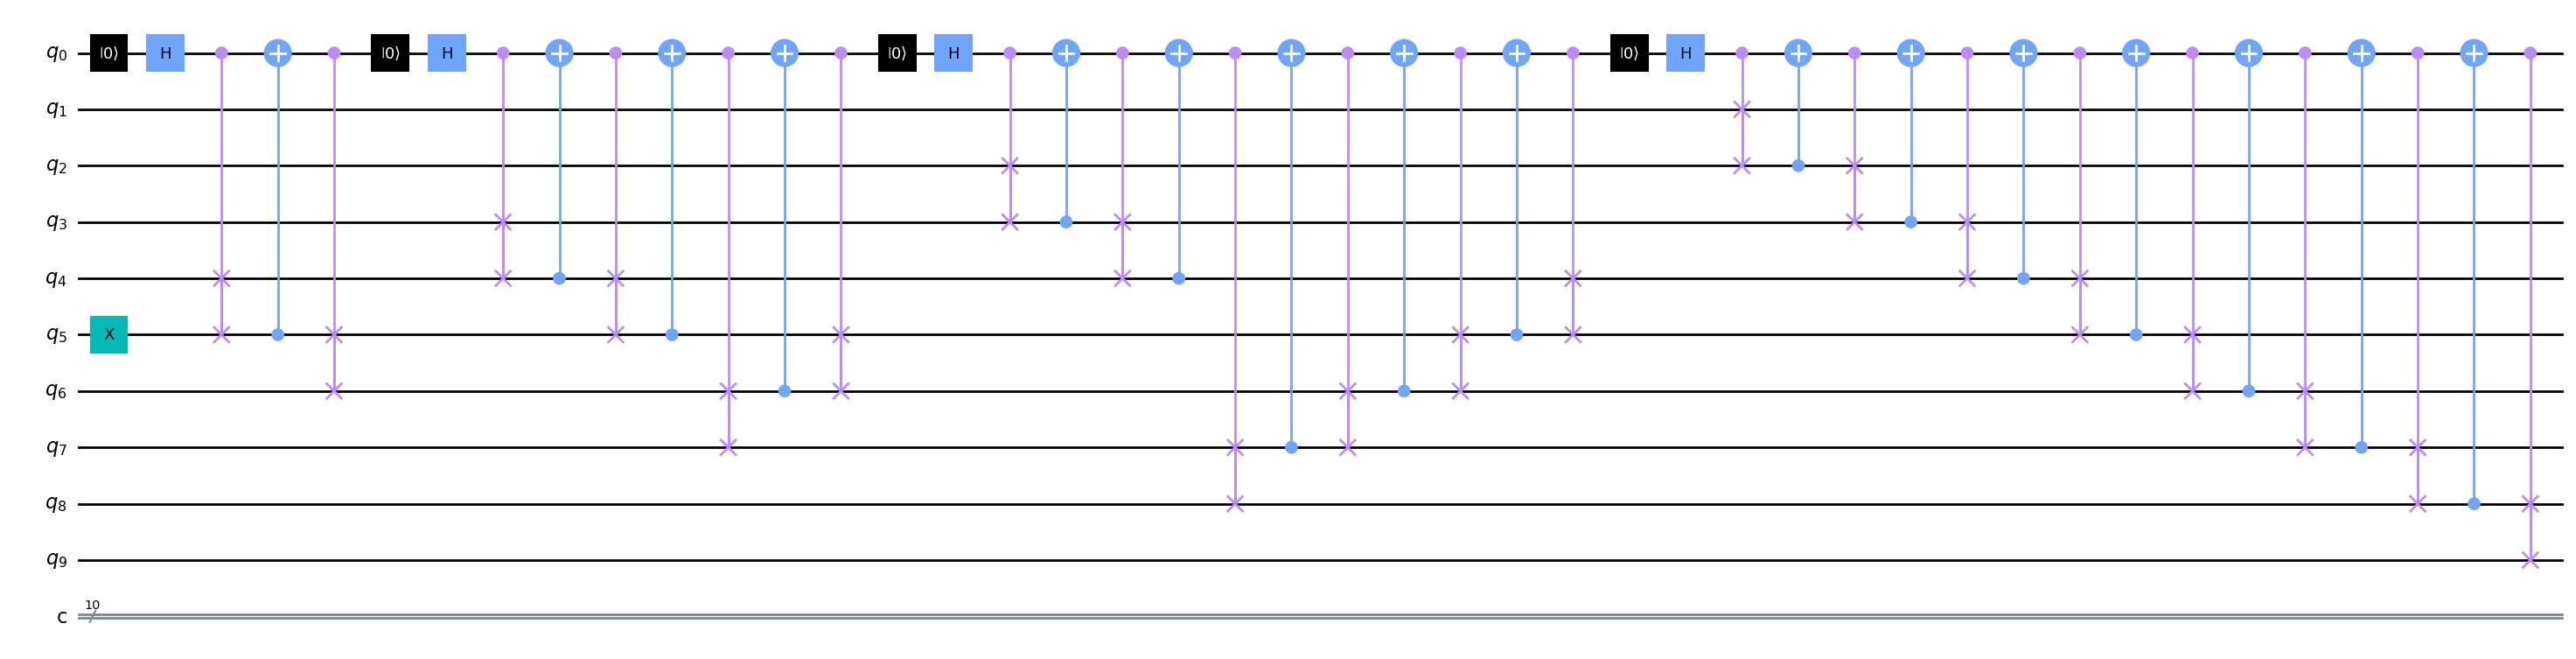

Measurement results (bitstrings):
0000100000 : 3748
0000001000 : 2529
0010000000 : 2465
0000000010 : 644
1000000000 : 614


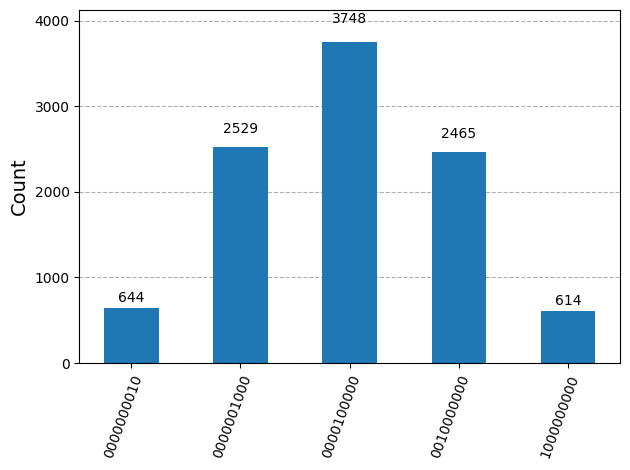

In [22]:
q = QuantumRegister(10, 'q')
c = ClassicalRegister(10, 'c')
qc = QuantumCircuit(q, c)

qc.reset(q[0])
qc.x(q[5])
qc.h(q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[5], q[6])

qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[6], q[7])
qc.cx(q[6], q[0])
qc.cswap(q[0], q[5], q[6])

qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[7], q[8])
qc.cx(q[7], q[0])
qc.cswap(q[0], q[6], q[7])
qc.cx(q[6],q[0])
qc.cswap(q[0],q[5],q[6])
qc.cx(q[5],q[0])
qc.cswap(q[0],q[4],q[5])

qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[1], q[2])
qc.cx(q[2], q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[5], q[6])
qc.cx(q[6], q[0])
qc.cswap(q[0], q[6], q[7])
qc.cx(q[7], q[0])
qc.cswap(q[0], q[7], q[8])
qc.cx(q[8], q[0])
qc.cswap(q[0], q[8], q[9])
qc.draw(output='mpl', style='clifford', fold=-1) 
plt.show()
for i in range(1, 10):
    qc.measure(q[i], c[i])

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1e4)
counts = job.result().get_counts()

print("Measurement results (bitstrings):")
for bitstring, count in sorted(counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{bitstring} : {count}")

plot_histogram(counts)
plt.show()


____

_____

### Trying to generalize

- From the above boards, clearly there's an easy to observe pattern in the last and first layer, the below code builds these layers for a n-level Galton board
- TODO: Middle layer generalization

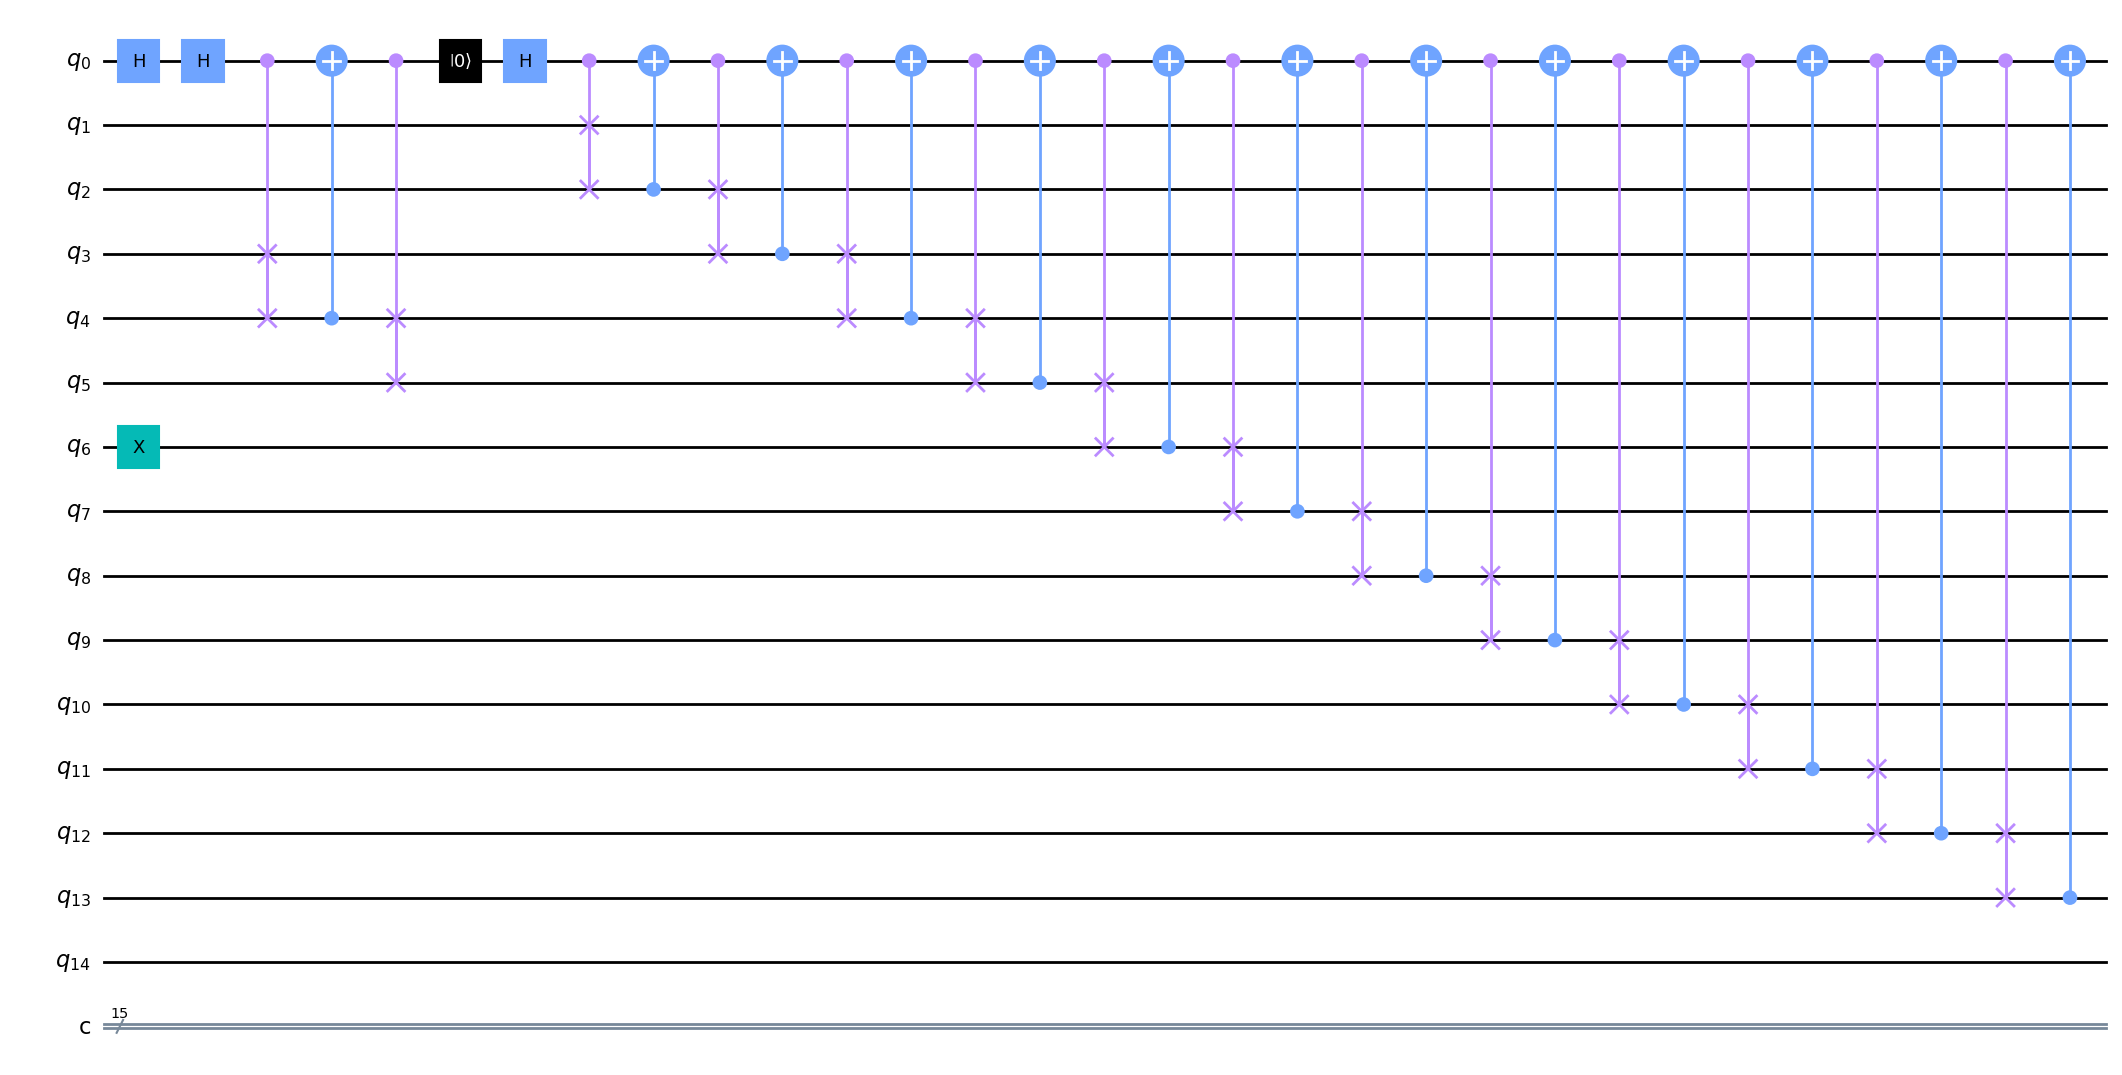

In [ ]:
def quantum_galton_board(levels):
    if levels < 1:
        raise ValueError("Number of levels must be at least 1")
    
    num_pegs = (levels * (levels + 1)) // 2
    q = QuantumRegister(num_pegs, 'q') # this is based on 4 level QGB
    c = ClassicalRegister(num_pegs, 'c')
    qc = QuantumCircuit(q, c)

    qc.h(q[0])

    # First layer
    qc.x(q[levels+1])
    qc.h(q[0])
    qc.cswap(q[0], q[levels-2], q[levels-1])
    qc.cx(q[levels-1], q[0])
    qc.cswap(q[0], q[levels-1], q[levels])

    # middle layers need to be generalized

    #Last layer (total pegs: levels+1 )
    qc.reset(q[0])
    qc.h(q[0])
    i = 0
    while i < num_pegs - 3:
        qc.cswap(q[0], q[i+1], q[i+2])
        qc.cx(q[i+2], q[0])
        qc.cswap(q[0], q[i+2], q[i+3])
        if i+4 < num_pegs:
            qc.cx(q[i+3], q[0])
        i += 2

    return qc

qc= quantum_galton_board(5)
qc.draw(output='mpl', style='clifford', fold=-1) 
plt.show()

___
___

## Biased 4 level QGB

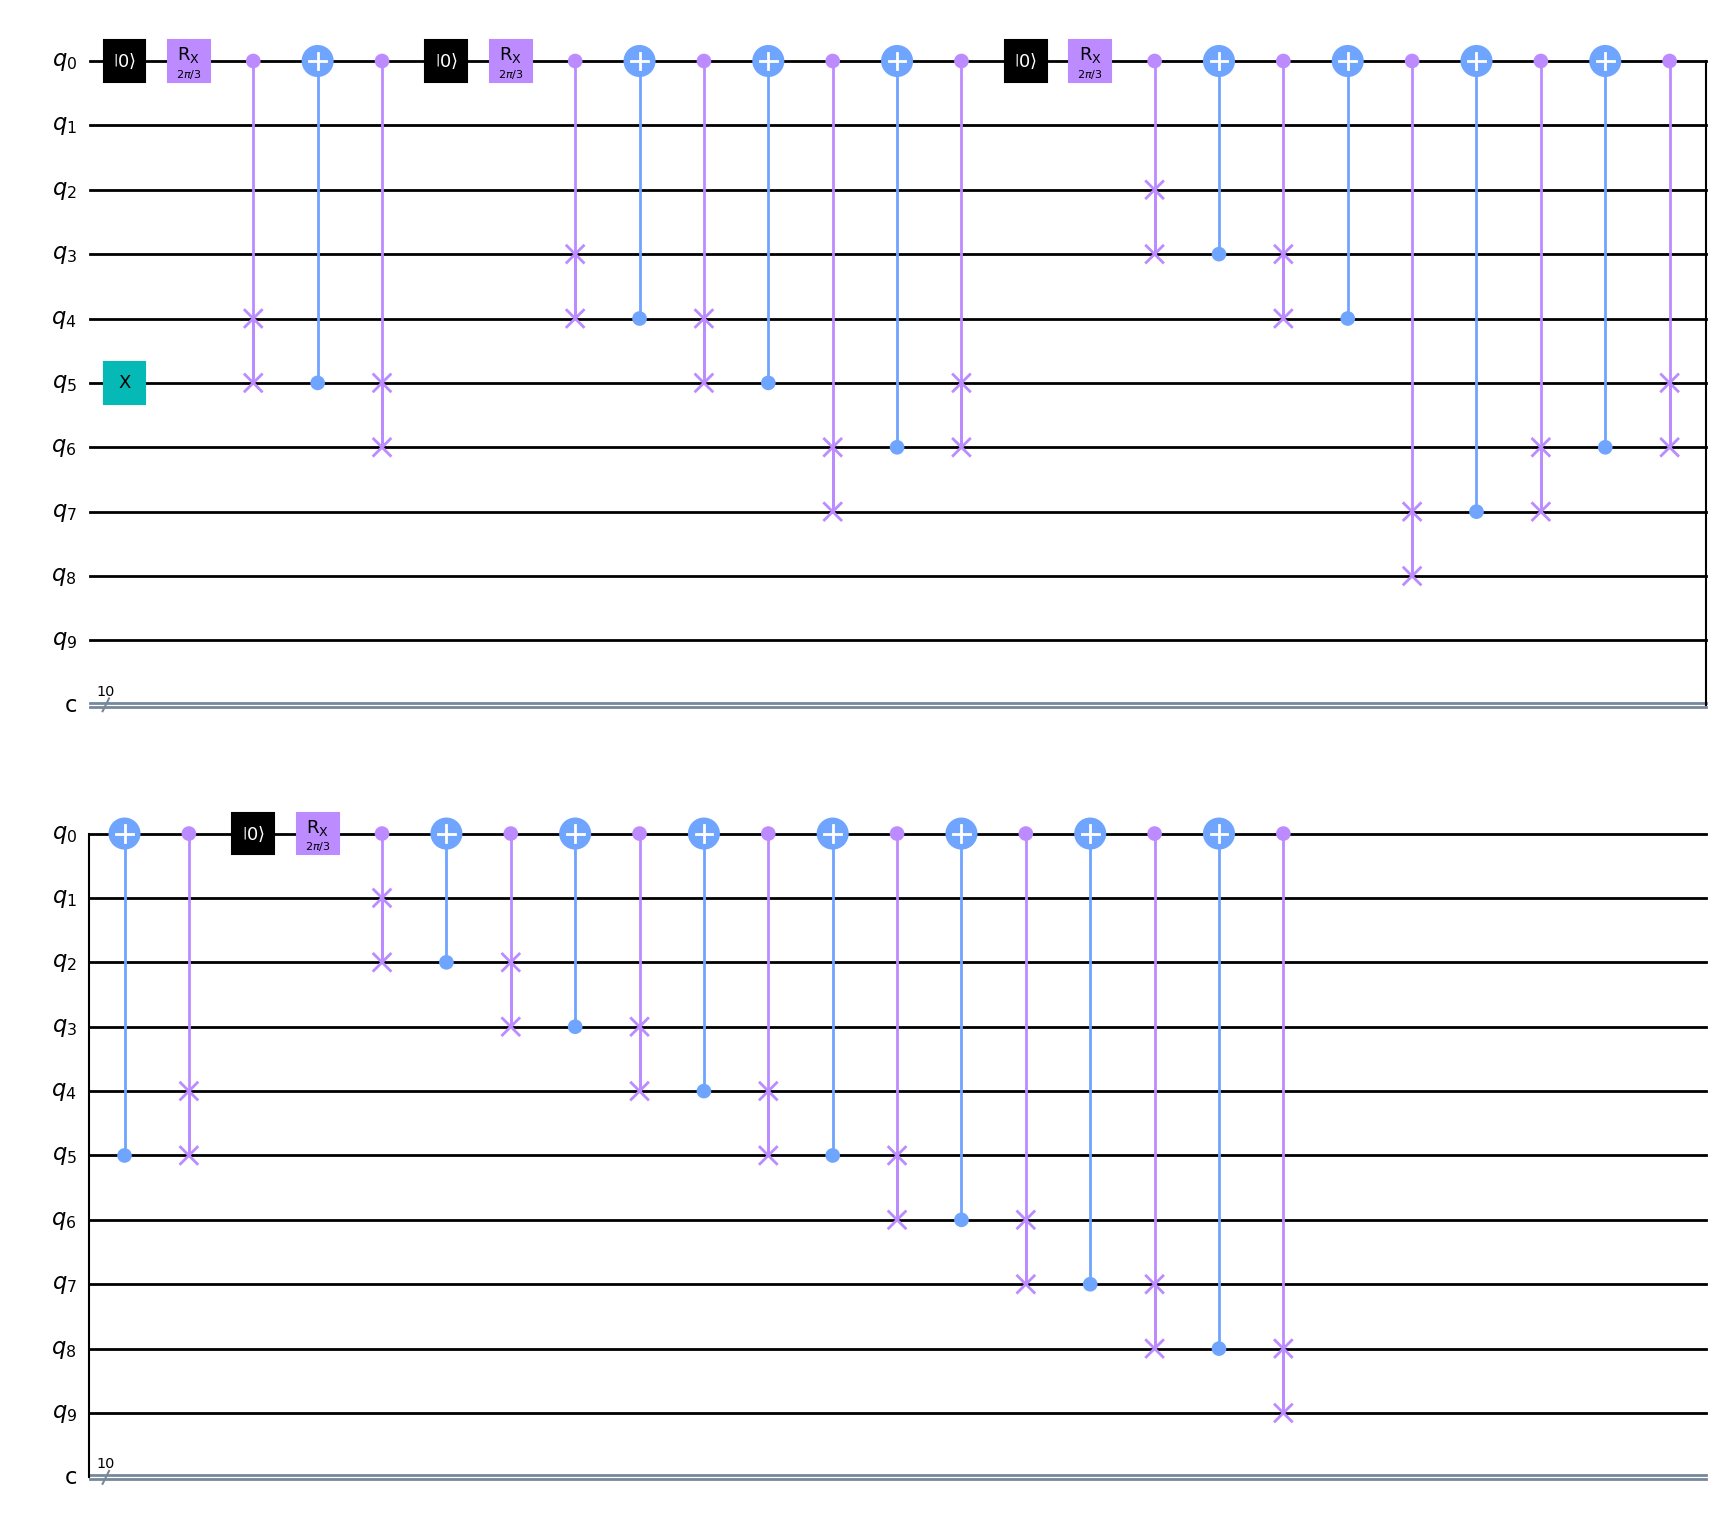

Measurement results (bitstrings):
0000000010 : 3196
0000001000 : 2546
0000100000 : 2297
0010000000 : 1601
1000000000 : 360


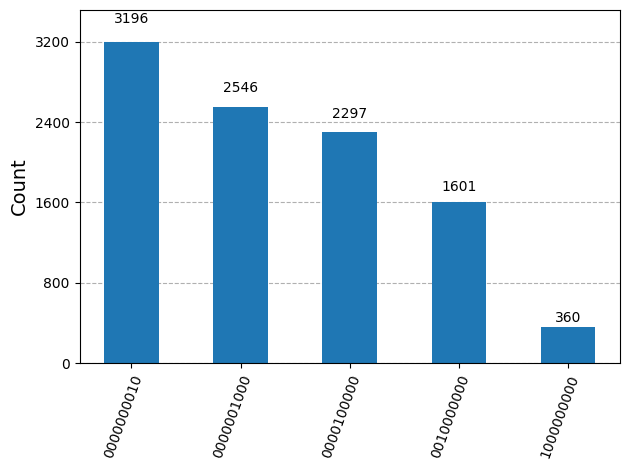

In [39]:
q = QuantumRegister(10, 'q')
c = ClassicalRegister(10, 'c')
qc = QuantumCircuit(q, c)

qc.reset(q[0])
qc.x(q[5])
qc.rx(2*np.pi/3, q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[5], q[6])

qc.reset(q[0])
qc.rx(2*np.pi/3, q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[6], q[7])
qc.cx(q[6], q[0])
qc.cswap(q[0], q[5], q[6])
###
qc.reset(q[0])
qc.rx(2*np.pi/3, q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[7], q[8])
qc.cx(q[7], q[0])
qc.cswap(q[0], q[6], q[7])
qc.cx(q[6],q[0])
qc.cswap(q[0],q[5],q[6])
qc.cx(q[5],q[0])
qc.cswap(q[0],q[4],q[5])

qc.reset(q[0])
qc.rx(2*np.pi/3, q[0])
qc.cswap(q[0], q[1], q[2])
qc.cx(q[2], q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[5], q[6])
qc.cx(q[6], q[0])
qc.cswap(q[0], q[6], q[7])
qc.cx(q[7], q[0])
qc.cswap(q[0], q[7], q[8])
qc.cx(q[8], q[0])
qc.cswap(q[0], q[8], q[9])
qc.draw(output='mpl', style='clifford') 
plt.show()
for i in range(1, 10):
    qc.measure(q[i], c[i])

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1e4)
counts = job.result().get_counts()

print("Measurement results (bitstrings):")
for bitstring, count in sorted(counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{bitstring} : {count}")

plot_histogram(counts)
plt.show()


### How to generalize the measurements ?